In [1]:
from mindvision.dataset import Mnist

# 下载并处理MNIST数据集
download_train = Mnist(path="./mnist", split="train", batch_size=32, repeat_num=1, shuffle=True, resize=32, download=True)

download_eval = Mnist(path="./mnist", split="test", batch_size=32, resize=32, download=True)

dataset_train = download_train.run()
dataset_eval = download_eval.run()

9913344B [05:04, 32584.00B/s]                                                                                          
29696B [00:00, 86720.98B/s]                                                                                            
1649664B [00:52, 31182.05B/s]                                                                                          
5120B [00:00, ?B/s]                                                                                                    
[WARNING] ME(11192:15100,MainProcess):2024-05-02-18:22:15.143.209 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(11192:15100,MainProcess):2024-05-02-18:22:15.144.217 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a fut

In [2]:
from mindvision.classification.models import lenet

network = lenet(num_classes=10, pretrained=False)

In [3]:
import mindspore.nn as nn

# 定义损失函数
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 定义优化器函数
net_opt = nn.Momentum(network.trainable_params(), learning_rate=0.01, momentum=0.9)


In [4]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# 设置模型保存参数，模型训练保存参数的step为1875
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

# 应用模型保存参数
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)


In [5]:
from mindvision.engine.callback import LossMonitor
from mindspore.train import Model

# 初始化模型参数
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'accuracy'})

# 训练网络模型，并保存为lenet-1_1875.ckpt文件
model.train(10, dataset_train, callbacks=[ckpoint, LossMonitor(0.01, 1875)])


Epoch:[  0/ 10], step:[ 1875/ 1875], loss:[0.005/0.490], time:13.987 ms, lr:0.01000
Epoch time: 16501.427 ms, per step time: 8.801 ms, avg loss: 0.490
Epoch:[  1/ 10], step:[ 1875/ 1875], loss:[0.004/0.057], time:14.065 ms, lr:0.01000
Epoch time: 16237.290 ms, per step time: 8.660 ms, avg loss: 0.057
Epoch:[  2/ 10], step:[ 1875/ 1875], loss:[0.085/0.040], time:14.879 ms, lr:0.01000
Epoch time: 16209.977 ms, per step time: 8.645 ms, avg loss: 0.040
Epoch:[  3/ 10], step:[ 1875/ 1875], loss:[0.014/0.032], time:13.919 ms, lr:0.01000
Epoch time: 16187.228 ms, per step time: 8.633 ms, avg loss: 0.032
Epoch:[  4/ 10], step:[ 1875/ 1875], loss:[0.026/0.024], time:14.138 ms, lr:0.01000
Epoch time: 18281.186 ms, per step time: 9.750 ms, avg loss: 0.024
Epoch:[  5/ 10], step:[ 1875/ 1875], loss:[0.010/0.022], time:15.257 ms, lr:0.01000
Epoch time: 17022.919 ms, per step time: 9.079 ms, avg loss: 0.022
Epoch:[  6/ 10], step:[ 1875/ 1875], loss:[0.002/0.018], time:15.302 ms, lr:0.01000
Epoch time

In [6]:
acc = model.eval(dataset_eval)

print("{}".format(acc))


{'accuracy': 0.9926883012820513}


In [7]:
from mindspore import load_checkpoint, load_param_into_net

# 加载已经保存的用于测试的模型
param_dict = load_checkpoint("./lenet/lenet-1_1875.ckpt")
# 加载参数到网络中
load_param_into_net(network, param_dict)


([],
 ['global_step',
  'learning_rate',
  'momentum',
  'moments.backbone.conv1.weight',
  'moments.backbone.conv2.weight',
  'moments.backbone.fc1.weight',
  'moments.backbone.fc1.bias',
  'moments.backbone.fc2.weight',
  'moments.backbone.fc2.bias',
  'moments.backbone.fc3.weight',
  'moments.backbone.fc3.bias'])

[WARNING] ME(11192:15100,MainProcess):2024-05-02-18:25:07.682.388 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(11192:15100,MainProcess):2024-05-02-18:25:07.683.399 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(11192:15100,MainProcess):2024-05-02-18:25:07.684.407 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(11192:15100,MainProcess):2024-05-02-18:25:07.685.395 [mindspore\dataset\core\validator_helpers.py:744] 'HWC

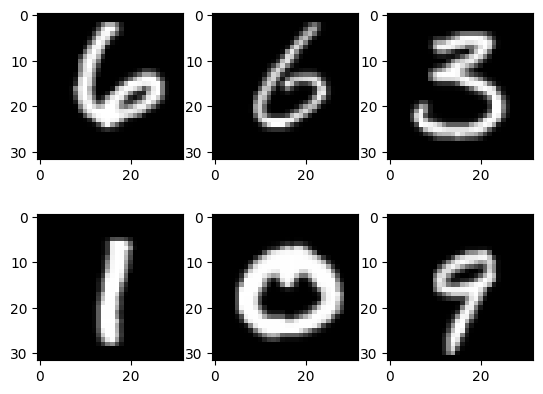

Predicted: "[6 6 3 1 0 9]", Actual: "[6 6 3 1 0 9]"


In [8]:
import numpy as np
from mindspore import Tensor
import matplotlib.pyplot as plt

mnist = Mnist("./mnist", split="train", batch_size=6, resize=32)
dataset_infer = mnist.run()
ds_test = dataset_infer.create_dict_iterator()
data = next(ds_test)
images = data["image"].asnumpy()
labels = data["label"].asnumpy()

plt.figure()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(images[i-1][0], interpolation="None", cmap="gray")
plt.show()

# 使用函数model.predict预测image对应分类
output = model.predict(Tensor(data['image']))
predicted = np.argmax(output.asnumpy(), axis=1)

# 输出预测分类与实际分类
print(f'Predicted: "{predicted}", Actual: "{labels}"')
